# Part 1: Data preprocessing

Dataset Link: https://www.kaggle.com/datasets/akram24/restaurant-reviews

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Exploration

In [4]:
dataset.shape

(1000, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
# statistical summary
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with missing values

In [8]:
print(f"Missing values : {dataset.isnull().values.any()}")

Missing values : False


## Countplot

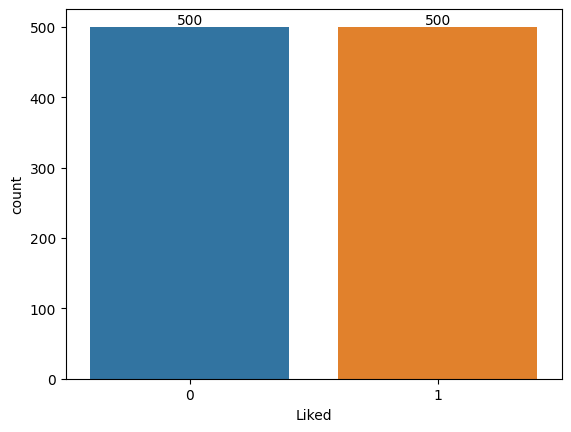

In [47]:
ax = sns.countplot(dataset, x = 'Liked')
for bars in ax.containers:
  ax.bar_label(bars)


In [10]:
# Positive Reviews
(dataset.Liked == 1).sum()

500

In [11]:
# Negetive Reviews
(dataset.Liked == 0).sum()

500

## Length of messages

In [12]:
dataset['Lenght'] = dataset.Review.apply(len)

In [13]:
dataset.head()

,Review,Liked,Lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

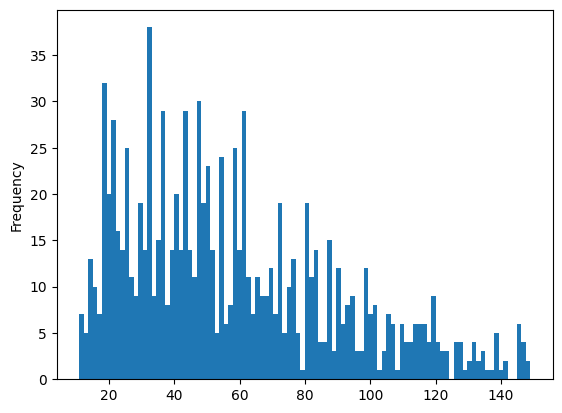

In [14]:
# Histogram
dataset['Lenght'].plot(bins = 100, kind = 'hist')

In [15]:
dataset.rename(columns = {'Lenght': "Length"}, inplace = True)

In [16]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [17]:
# Longest message
dataset[dataset.Length == dataset.Length.max()]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [18]:
# Shortest message
dataset[dataset.Length == dataset.Length.min()]['Review'].iloc[0]

'DELICIOUS!!'

In [19]:
positive = dataset[dataset["Liked"] == 1]
negative = dataset[dataset["Liked"] == 0]

In [20]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [21]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [22]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


## Cleaning the text

In [23]:
import re # regular expression
import nltk # natural language
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # for stemming the words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# cleaning text
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-]', " ",dataset['Review'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [25]:
len(corpus)

1000

## Creating the bag of words model

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [48]:
display(x.shape)
display(y.shape)

(1000, 1500)

(1000,)

In [50]:
print(x[[0,0]])
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64


## Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [32]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(800, 1500)

(200, 1500)

(800,)

(200,)

# Part 2: Model Building

## 1) Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [35]:
y_pred = classifier_nb.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
print(accuracy_score(y_test, y_pred))

0.7


In [38]:
print(confusion_matrix(y_test, y_pred))

[[60 53]
 [ 7 80]]


## 2) XGBoost Classifier

In [39]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = classifier_xgb.predict(x_test)

In [41]:
print(accuracy_score(y_test, y_pred))

0.72


In [42]:
print(confusion_matrix(y_test, y_pred))

[[86 27]
 [29 58]]


# Part 3: Final Model ( XGBoost Classifier )

In [43]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = classifier_xgb.predict(x_test)

In [45]:
print(accuracy_score(y_test, y_pred))

0.72


In [46]:
print(confusion_matrix(y_test, y_pred))

[[86 27]
 [29 58]]
